Train data RMSE at degree  0  =  57.11251235956631
Train data RMSE at degree  1  =  38.022751505856945
Train data RMSE at degree  2  =  25.96717203035406
Train data RMSE at degree  3  =  7.242159736162285
Train data RMSE at degree  5  =  6.705380988433246
Train data RMSE at degree  10  =  8.72259010700172



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


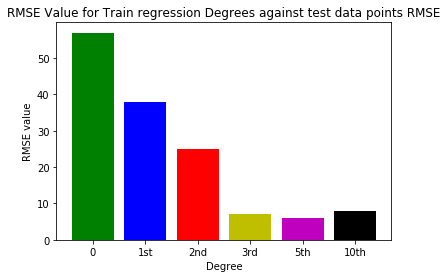

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as linalg
import numpy as np

#Import Data into a data frame
data = pd.DataFrame.from_csv('MLData.csv')

testData = data.iloc[14:] #Gets X and Y data for last 6 points
trainData = data.iloc[:14] #Gets X and Y data for first 14 points
testData = testData.sort_values(by=['x']) #Sorts the test data by X values
trainData = trainData.sort_values(by=['x']) #Sorts the train data by X values
X_train, X_test = trainData['x'].as_matrix(), testData['x'].as_matrix() #Splits the Test and Train Xs into variables
Y_train, Y_test = trainData['y'].as_matrix(), testData['y'].as_matrix() #Splits the Test and Train Ys into variables

data = data.sort_values(by=['x']) #Sorts the original data frame by the X values
X_data = data['x'].as_matrix() #Creates matrix of all X values
Y_data = data['y'].as_matrix() #Create matrix of all Y values


#Function returns the weights for the polynomial function
def pol_regression(features, y , degree):
    Van = np.vander(features, degree + 1)  #Creates a Vander matrix of all the X data to the desired degree
    VanSqr = Van.transpose().dot(Van) #Squares the Vander matrix
    parameters = np.linalg.solve(VanSqr, Van.transpose().dot(y)) #Gets the weights using linalg.solve
    return parameters

#Function returns the target Y based on given weights and a single x value
def getPredY(w, x):
    predY = 0.0 #Declares a float to be used later
    
    for i in range(0, w.size): #Loops through the weights
        predY += w[w.size - (i +1)] * x ** i #Totals up to the Target based on the polynomial function
    return predY

#Function returns array of Y values based on an array of X values
def getCurveY(w, x):
    curveY = np.ones(x.size) #Creates an array the same size as the X values array
    for i in range(0, x.size): #Loops through X values indexes
        curveY[i] = getPredY(w, x[i]) #Calls the getPredY value to get Target from each X
    return curveY
    
#Function returns RMSE value based on wights and arrays of X and the corresponding Y values
def eval_pol_regression(w, x, y):   
    sse = 0.0; #declairs a float to be used later
    for i in range(0, x.size): #Loops through X values indexes
        sse += ((y[i] - getPredY(w, x[i])) ** 2) #Totals the SSE values for each X point 
        
    rmse = np.sqrt((sse) / x.size) #Gets the mean of the SSE and sqrts it to get the RMSE value
    return rmse

#########################################################################################################

curve = np.linspace(-5,5, 100)

rmseDegrees = np.asarray(['0','1st','2nd','3rd','5th','10th'])
rmseTestValue = np.asarray([0,0,0,0,0,0])

for i in range(0, 4):
    rmseTrainValue[i] = eval_pol_regression(pol_regression(X_train, Y_train, i), X_test, Y_test)
rmseTrainValue[4] = eval_pol_regression(pol_regression(X_train, Y_train, 5), X_test, Y_test)
rmseTrainValue[5] = eval_pol_regression(pol_regression(X_train, Y_train, 10), X_test, Y_test)

# for i in range(0, 5):
#     rmseTestValue[i] = eval_pol_regression(pol_regression(X_data, Y_data, i+1), X_data, Y_data)
# rmseTestValue[5] = eval_pol_regression(pol_regression(X_data, Y_data, 10), X_data, Y_data)


for i in range(0, 4):
    print('Train data RMSE at degree ', i , ' = ', eval_pol_regression(pol_regression(X_train, Y_train, i), X_test, Y_test))
print('Train data RMSE at degree  5  = ', eval_pol_regression(pol_regression(X_train, Y_train, 5), X_test, Y_test))
print('Train data RMSE at degree  10  = ', eval_pol_regression(pol_regression(X_train, Y_train, 10), X_test, Y_test))

print('')

# for i in range(0,6):
#     print('Test data RMSE at degree ' , i , ' = ', eval_pol_regression(pol_regression(X_data, Y_data, i), X_test, Y_test))
# print('Test data RMSE at degree 10 = ', eval_pol_regression(pol_regression(X_data, Y_data, 10), X_test, Y_test))
    



# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 0), curve), 'g', label=('0 Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('0 degree Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()

# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 1), curve), 'g', label=('1st Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('1st degree Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()

# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 2), curve), 'b', label=('2nd Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('2nd degreee Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()

# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 3), curve), 'r', label=('3rd Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('3rd degree Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()

# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 5), curve), 'm', label=('5th Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('5th degree Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()

# plt.plot(curve, getCurveY(pol_regression(X_data, Y_data, 10), curve), 'c', label=('10th Degree'))
# plt.plot(X_data, Y_data, 'ko', label=('Raw data'))
# plt.title('10th degree Regression for Raw Data')
# plt.axis((-5,5,-200, 50))
# plt.legend(loc='lower right')
# plt.show()










plt.bar(rmseDegrees, rmseTrainValue, color=['g', 'b', 'r', 'y', 'm', 'k'])
plt.title('RMSE Value for Train regression Degrees against test data points RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE value')
plt.show()
